In [190]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [191]:
data = pd.read_csv("kepler_dataset.csv")
data = np.array(data)

X = data[:,:-2]
y = data[:,-2:-1]
t = X.shape[0]

#split into ratios of 60 20 20 for training,test and cross validation
train_x = X[:(j:=int(t*0.6))]
train_y = y[:j]

test_x = X[j:(r:=j+int(0.2*t))]
test_y = y[j:r]

cv_x = X[r:]
cv_y = y[r:]


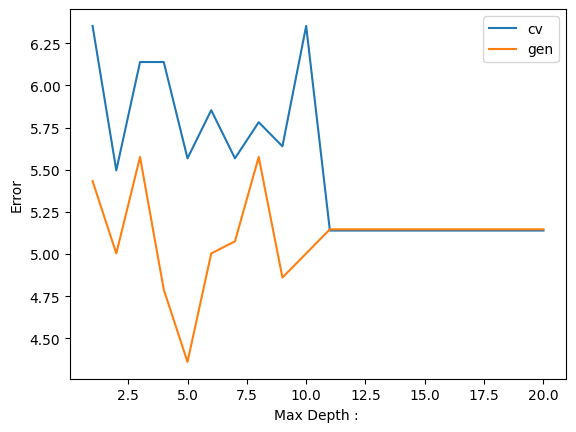

In [199]:
#finding max depth

depths = list(range(1,21))

cverror = []
generror = []



def calculate_error(model,x,y):
    preds = model.predict(x)
    yf = y.flatten()
    err = ((preds!=yf).sum())*100/x.shape[0]
    return err

for i in range(1,21):
    model = XGBClassifier(objective='binary:logistic',n_estimators=250,max_depth = i,learning_rate=1)
    model.fit(train_x,train_y)

    cverror.append(k:=calculate_error(model,cv_x,cv_y))
    # print(k)
    generror.append(k:=calculate_error(model,test_x,test_y))
    # print(k)

plt.plot(depths,cverror,label = "cv")
plt.plot(depths,generror,label= "gen")

plt.xlabel("Max Depth : ")
plt.ylabel("Error")

plt.legend()
plt.show()
    

depth to choose - 11

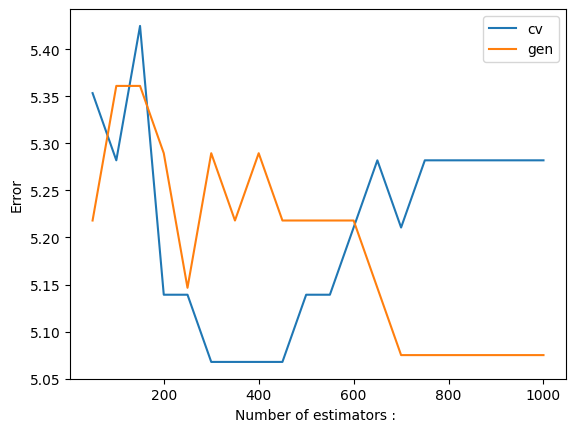

In [202]:
#choosing estimators

es = list(range(50,1001,50))

cverror = []
generror = []



def calculate_error(model,x,y):
    preds = model.predict(x)
    yf = y.flatten()
    err = ((preds!=yf).sum())*100/x.shape[0]
    return err

for i in range(50,1001,50):
    model = XGBClassifier(objective='binary:logistic',n_estimators=i,max_depth = 11,learning_rate=1)
    model.fit(train_x,train_y)

    cverror.append(k:=calculate_error(model,cv_x,cv_y))
    # print(k)
    generror.append(k:=calculate_error(model,test_x,test_y))
    # print(k)

plt.plot(es,cverror,label = "cv")
plt.plot(es,generror,label= "gen")

plt.xlabel("Number of estimators : ")
plt.ylabel("Error")

plt.legend()
plt.show()
    

Choosing 750 as the number of estimators

In [214]:
#using XGBClassifier 

model = XGBClassifier(objective='binary:logistic',n_estimators=750,max_depth = 11,learning_rate=0.2)
model.fit(train_x,train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=750, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [223]:
print("Generalisation Accuracy : ",100-calculate_error(model,test_x,test_y))

print("\nOverall Accuracy over entire data : ",100-calculate_error(model,X,y))

Generalisation Accuracy :  95.13938527519657

Overall Accuracy over entire data :  97.95685097871124
